In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
from myimports  import *
import myJupyterUtils ## Remove stacktraces on Keyboardinterupt
plt.style.use('ggplot')

In [2]:
from noiseDistributions import PoissonProba, expectedNoise_ByIntegration
from noiseDistributions import LaplaceNoise , GaussianNoise

### E(N | P+N = x)
This notebooks demonstrates estimation of E(N | P+N = x) where:
- P is a poisson variable of known parameter
- N is a noise with a known distribution, either gaussian or Laplace

Motivation: such estimation is used to compute the gradient when fitting a model on noised aggregated data (up to some "mean field" approximation).

In both cases, I did not find any close formula. Numeric integration can provide a result, but is slow / not always stable (especially when x is large).
- in the case of Laplace noise, an approximate close formula seems to work quite well
- in the case of Gaussian noise, replacing the expectation by the mode allows fast numeric approximation and seems good enough.


### Case of Laplace noise


Text(0.5, 1.0, 'Discrete Laplace distribution ')

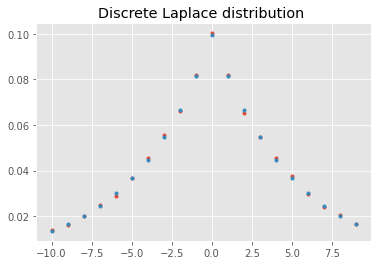

In [10]:
epsilon = 0.2
laplaceDistrib = LaplaceNoise(epsilon)
s = laplaceDistrib.Sample( 100000 )
c = Counter(s)
m = 10
ks = np.arange(-m,m)
plt.plot(ks ,  [ c.get(k)/len(s) for k in ks  ]   , "." )
plt.plot(ks,  laplaceDistrib.Proba( ks) , "." )
plt.title( "Discrete Laplace distribution " )

#### numeric intergration

- E(N | Poisson+N = x )  = Sum (  n * P(N=n) * P( Poisson = x-n )  )  /    Sum ( P(N=n) * P( Poisson = x-n )  )
- we observe that the Poisson expecation has a "sigmoid like" shape when freezing epsilon and  poisson parameter (as a function of P+N)

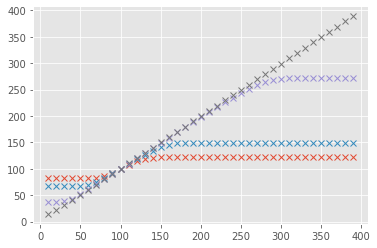

In [11]:
for epsilon in [0.2 , 0.4 , 1.0, 2.0]:
    noiseDistrib = LaplaceNoise( epsilon )
    poissonParam = 100
    observedDatas = np.arange( 10,400,10 )
    expectedNoise  = np.array ([ expectedNoise_ByIntegration( observedData , poissonParam, noiseDistrib) for observedData in observedDatas ])
    plt.plot( observedDatas , observedDatas -expectedNoise   , "x" )    

Shape observed above suggest a piece-wise affine approx with 3 pieces.
This graph shows that the approximation seems not too far.

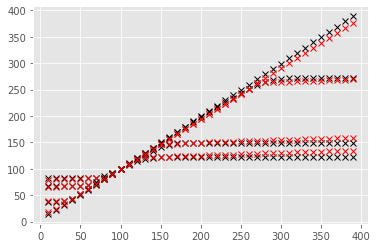

In [5]:
for epsilon in [0.2 , 0.4 , 1.0, 2.0]:
    noiseDistrib = LaplaceNoise( epsilon )

    poissonParam = 100
    observedDatas = np.arange( 10,400,10 )
    expectedNoise  = np.array ([ expectedNoise_ByIntegration( observedData , poissonParam, noiseDistrib) for observedData in observedDatas ])
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xk" )  
    
    expectedNoise = noiseDistrib.expectedNoiseApprox(observedDatas, poissonParam) 
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xr" )  

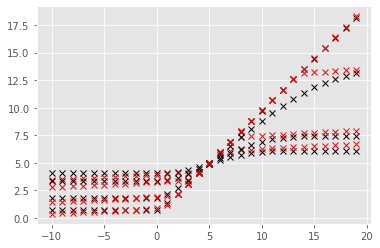

In [6]:
 for epsilon in [0.2 , 0.4 , 1.0, 2.0]:
    noiseDistrib = LaplaceNoise( epsilon )

    poissonParam = 5.0
    observedDatas = np.arange( -10,20  )
    expectedNoise  = np.array ([ expectedNoise_ByIntegration( observedData , poissonParam, noiseDistrib) for observedData in observedDatas ])
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xk" )  
    
    expectedNoise = noiseDistrib.expectedNoiseApprox(observedDatas, poissonParam) 
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xr" )      

### Case of Gaussian noise

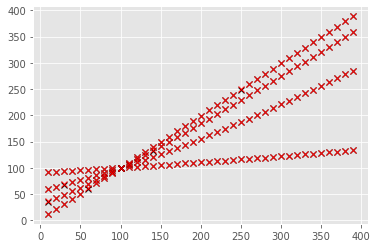

In [7]:
poissonParam = 100
observedDatas = np.arange( 10,400,10 )
    
for sigma in [30.0 , 10.0 , 5.0 , 1.0, ]:
    noiseDistrib = GaussianNoise( sigma )
    expectedNoise  = np.array ([ expectedNoise_ByIntegration( observedData , poissonParam, noiseDistrib) for observedData in observedDatas ])
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xk" )  
    expectedNoise = noiseDistrib.expectedNoiseApprox(observedDatas, poissonParam) 
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xr" )
    

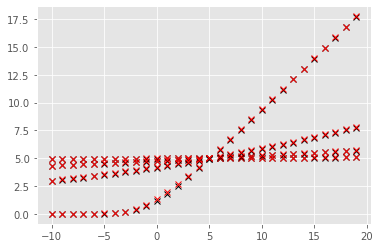

In [8]:
poissonParam = 5.0
observedDatas = np.arange( -10, 20 )

for sigma in [30.0 , 10.0 , 5.0 , 1.0, ]:
    noiseDistrib = GaussianNoise( sigma )
    expectedNoise  = np.array ([ expectedNoise_ByIntegration( observedData , poissonParam, noiseDistrib) for observedData in observedDatas ])
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xk" )  
    expectedNoise = noiseDistrib.expectedNoiseApprox(observedDatas, poissonParam) 
    plt.plot( observedDatas , observedDatas -expectedNoise   , "xr" )